In [1]:
from qanneal.sdeq import IsingHamiltonian

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
N = 5
h = {}
J = {(0, 1): -1, (0, 3): 1, (0, 4): -1, (1, 2): 1, (1, 4): -1, (2, 3): -1, (2, 4): -1, (3, 4): -1}

In [3]:
ising = IsingHamiltonian(h, J)
ising.induce_transverse_field()
# ising.induce_highord_driver(2)

In [4]:
annealing_time = 1000
num_steps = 100
tlist = np.linspace(0, annealing_time, num_steps)
spectrums = ising.energy_spectrum(tlist)

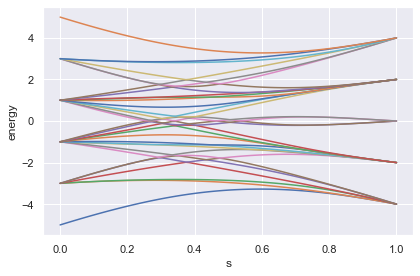

In [5]:
plt.plot(spectrums.time / annealing_time, spectrums.energy)
plt.xlabel('s')
plt.ylabel('energy')
plt.tight_layout()
plt.show()

In [6]:
expects = ising.solve_sdeq(tlist)

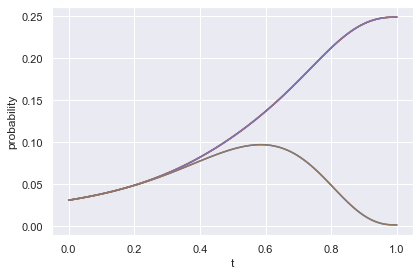

In [7]:
import numpy as np

plt.plot(expects.time / annealing_time, expects.expect[:, :6])
plt.xlabel('t')
plt.ylabel('probability')
plt.tight_layout()
plt.show()

In [8]:
Tlist = np.geomspace(1e-2, 1e3, 50)

expect_hists = {}
for at in Tlist:
    tlist_at = np.linspace(0, at, num_steps)
    expects = ising.solve_sdeq(tlist_at)
    expect_hists[at] = expects.expect[-1]

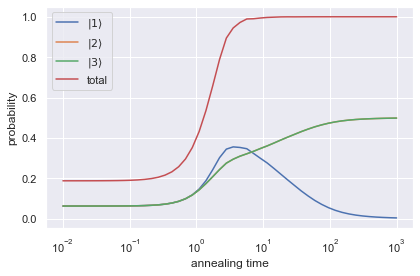

In [9]:
plt.plot(Tlist, [sum(expect_hists[at][[0, 5]]) for at in Tlist], label=r'$|1\rangle$')
plt.plot(Tlist, [sum(expect_hists[at][[1, 4]]) for at in Tlist], label=r'$|2\rangle$')
plt.plot(Tlist, [sum(expect_hists[at][[2, 3]]) for at in Tlist], label=r'$|3\rangle$')
plt.plot(Tlist, [sum(expect_hists[at][:6]) for at in Tlist], label='total')

plt.xscale('log')
plt.xlabel('annealing time')
plt.ylabel('probability')
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
lam = 1e-4
H = ising.H_prob + lam * ising.H_driver
evals_perturb, evecs_perturb = H.eigenstates()
min_evec = evecs_perturb[np.argmin(evals_perturb)]
print(np.transpose(min_evec))

[[1.00004995e-04+0.j 1.66672226e-09+0.j 2.50004164e-05+0.j
  8.33236105e-06+0.j 2.50004164e-05+0.j 8.33236105e-06+0.j
  4.99924992e-01+0.j 4.99924992e-01+0.j 2.50079158e-05+0.j
  8.33486100e-06+0.j 1.66688911e-09+0.j 1.66688932e-09+0.j
  8.33444426e-10+0.j 8.33444281e-10+0.j 8.33236105e-06+0.j
  2.50004164e-05+0.j 2.50079158e-05+0.j 8.33486100e-06+0.j
  8.33444426e-10+0.j 8.33444313e-10+0.j 1.66688932e-09+0.j
  1.66688932e-09+0.j 8.33236105e-06+0.j 2.50004164e-05+0.j
  5.00074984e-01+0.j 5.00074984e-01+0.j 8.33486100e-06+0.j
  2.50079158e-05+0.j 8.33486100e-06+0.j 2.50079158e-05+0.j
  1.66672196e-09+0.j 1.00004980e-04+0.j]]
